https://www.opendataphilly.org/dataset/vehicular-crash-data



https://phl.carto.com/api/v2/sql?q=SELECT+*+FROM+crash_data_collision_crash_2007_2017&filename=crash_data_collision_crash_2007_2017&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator

In [1]:
%matplotlib inline

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
crash_data = pd.read_csv('../../data/crash_data_collision_crash_2007_2017.csv')

In [4]:
crash_data.head(20)

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,,
1,,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,,
2,,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,,
3,,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,,
4,,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,,
5,,9858,2016048649,6,67,67301,2016,4,5,815,...,0,0,0,0,4,0,39.9722,-75.2260,,
6,,9930,2016017030,6,67,67301,2016,1,4,1850,...,0,0,0,0,8,0,39.9849,-75.1583,,
7,,9019,2016026138,6,67,67301,2016,2,6,855,...,0,0,0,0,2,0,40.0123,-75.1754,,
8,,1,2017037489,6,67,67301,2017,3,3,139,...,0,0,0,0,8,1,40.0446,-75.0547,,Philadelphia
9,,2,2017014006,6,67,67301,2017,1,5,700,...,0,0,0,0,8,0,39.9693,-75.1432,,Philadelphia


In [5]:
crash_data.columns

Index(['wz_ln_closure', 'objectid_1', 'crn', 'district', 'county',
       'municipality', 'crash_year', 'crash_month', 'day_of_week',
       'time_of_day', 'hour_of_day', 'illumination', 'weather',
       'road_condition', 'collision_type', 'relation_to_road',
       'work_zone_type', 'work_zone_loc', 'work_zone_ind', 'intersect_type',
       'tcd_type', 'location_type', 'urban_rural', 'fatal_count',
       'injury_count', 'person_count', 'total_units', 'sch_bus_ind',
       'sch_zone_ind', 'latitude', 'longitude', 'arrival_tm',
       'cons_zone_spd_lim', 'dispatch_tm', 'est_hrs_closed', 'lane_closed',
       'ln_close_dir', 'ntfy_hiwy_maint', 'spec_juris_cd', 'tcd_func_cd',
       'tfc_detour_ind', 'workers_pres', 'wz_close_detour', 'wz_flagger',
       'wz_law_offcr_ind', 'objectid', 'wz_moving', 'wz_other',
       'wz_shlder_mdn', 'vehicle_count', 'automobile_count',
       'motorcycle_count', 'bus_count', 'small_truck_count',
       'heavy_truck_count', 'suv_count', 'van_count', '

In [6]:
for year, ydf in crash_data.groupby('crash_year'):
    print(year, ydf.shape)

2011 (9941, 90)
2012 (11281, 90)
2013 (11072, 90)
2014 (10565, 90)
2015 (11453, 90)
2016 (12137, 90)
2017 (11013, 90)


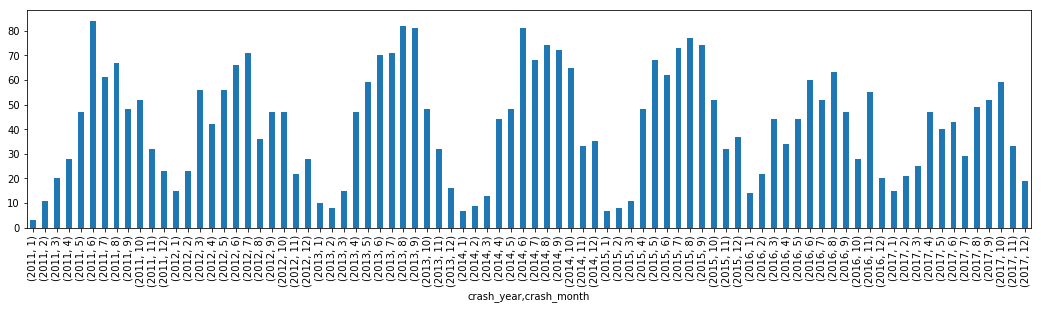

In [7]:
plt.figure(figsize=(18,4))
crash_data.groupby(['crash_year','crash_month'])['bicycle_count'].sum().plot.bar()

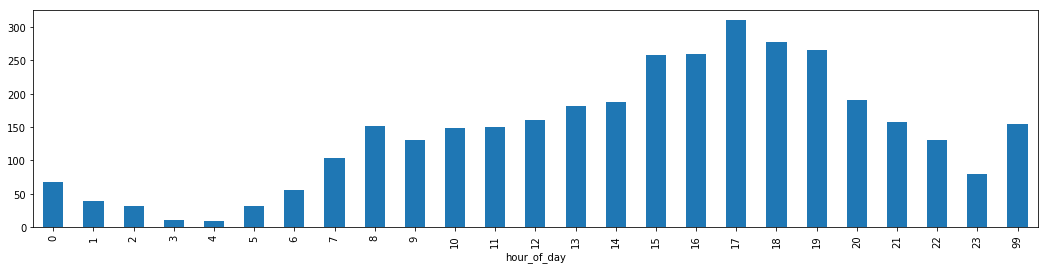

In [27]:
plt.figure(figsize=(18,4))
crash_data.groupby(['hour_of_day'])['bicycle_count'].sum().plot.bar()

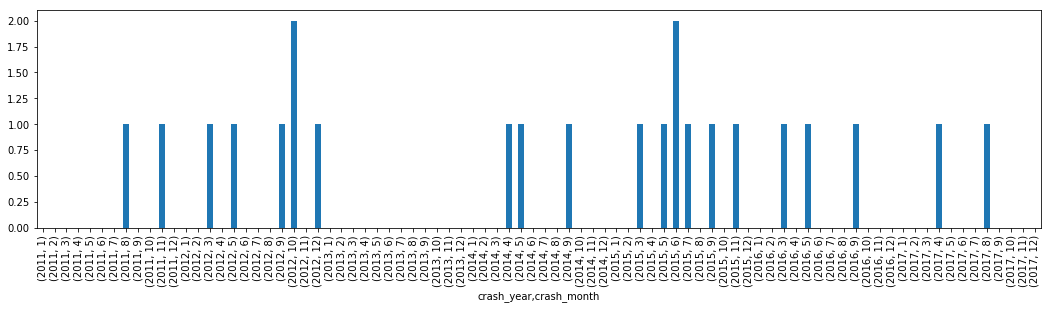

In [8]:
plt.figure(figsize=(18,4))
bike_crash = crash_data[crash_data['bicycle_count']>0]
bike_crash.groupby(['crash_year','crash_month'])['fatal_count'].sum().plot.bar()

In [9]:
crash_data['fatal_count'].value_counts()

0    76843
1      582
2       29
3        6
4        2
Name: fatal_count, dtype: int64

In [16]:
crash_data[crash_data['fatal_count']==2]

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
402,,395,2017038893,6,67,67301,2017,4,6,855,...,0,0,0,0,1,1,40.0265,-75.1151,2,Philadelphia
1298,,1291,2017020754,6,67,67301,2017,2,3,1259,...,0,1,1,0,1,0,40.1052,-74.9934,2,Philadelphia
1571,,1564,2017018990,6,67,67301,2017,1,7,2342,...,0,2,2,0,1,0,40.0330,-75.0802,2,Philadelphia
17048,,17049,2016048698,6,67,67301,2016,4,6,247,...,0,0,0,0,1,0,39.9136,-75.1380,2,
18410,,18411,2016129286,6,67,67301,2016,11,6,1850,...,0,0,0,0,1,0,40.0684,-75.0059,2,
20672,,20673,2016134187,6,67,67301,2016,12,1,2056,...,0,0,0,0,1,1,40.0710,-75.0378,2,
20920,,20921,2016105599,6,67,67301,2016,9,5,1340,...,0,0,0,0,1,0,40.0433,-75.1132,2,
21379,,21380,2016111084,6,67,67301,2016,10,6,25,...,0,0,0,0,1,0,40.0259,-75.1232,2,
22084,,22085,2016087165,6,67,67301,2016,8,1,1355,...,0,0,0,0,1,0,40.0218,-75.1997,2,
23530,,23531,2015056094,6,67,67301,2015,5,7,229,...,0,0,0,0,1,0,39.9594,-75.2453,2,


In [17]:
crash_data['bicycle_death_count'].value_counts()

0    77440
1       22
Name: bicycle_death_count, dtype: int64

In [18]:
crash_data['bicycle_maj_inj_count'].value_counts()

0    77371
1       91
Name: bicycle_maj_inj_count, dtype: int64

In [19]:
crash_data[crash_data['bicycle_count']>0]['bicycle_death_count'].value_counts()

0    3496
1      22
Name: bicycle_death_count, dtype: int64

In [20]:
crash_data[crash_data['bicycle_count']>0]['bicycle_maj_inj_count'].value_counts()

0    3427
1      91
Name: bicycle_maj_inj_count, dtype: int64

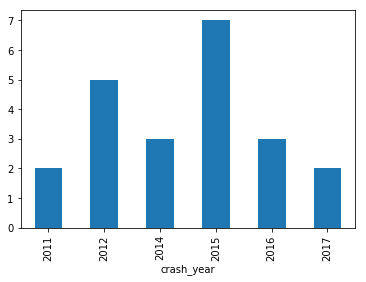

In [30]:
crash_data[(crash_data['bicycle_death_count']>0) ].groupby('crash_year')['bicycle_death_count'].sum().plot.bar()

In [34]:
bicycle_injuries = crash_data[(crash_data['bicycle_death_count']>0) | (crash_data['bicycle_maj_inj_count']>0)]

In [38]:
bicycle_injuries.groupby('crash_year')[['bicycle_death_count', 'bicycle_maj_inj_count']].sum().plot.bar

Object `plot.bar` not found.


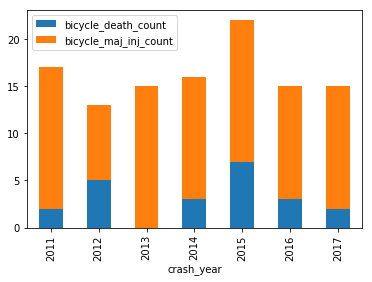

In [40]:
bicycle_injuries.groupby('crash_year')[['bicycle_death_count', 'bicycle_maj_inj_count']].sum().plot(stacked=True, kind='bar')

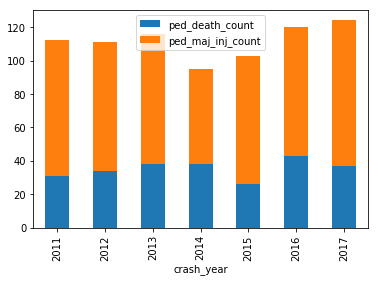

In [46]:
ped_accidents = crash_data[crash_data['ped_count']>0]
ped_accidents.groupby('crash_year')['ped_death_count', 'ped_maj_inj_count'].sum().plot(kind='bar', stacked=True)

In [49]:
bike_crash[['dec_lat', 'dec_long']]

,dec_lat,dec_long
28,39.9911,-75.1329
36,39.9374,-75.1630
119,40.0404,-75.0655
132,39.9612,-75.1749
151,39.9441,-75.1535
196,40.0324,-75.2325
201,39.9965,-75.1137
209,39.9731,-75.1484
242,39.9736,-75.1871
253,40.0072,-75.1274


In [20]:
cb=open('crash_data_code_book.txt').read()

In [2]:
import re

In [21]:
lines = cb.split('\n')

In [23]:
cols = lines[0].split()

In [24]:
cols

['Column_Name', 'Short_Description', 'Type', 'Length', 'Constraints']

In [28]:
lines[1]

'ARRIVAL_TM Time police arrived at the scene TEXT 4 HHMM'

In [62]:
tab=[re.split('^([A-Z0-9_]+)\s(.*)\s([A-Z]+)\s(\d(?:\.\d)?)\s*(.*)$', l) for l in lines[1:]]

In [63]:
tab2 = [r[1:-1] for r in tab]

In [67]:
cb_df=pd.DataFrame(tab2, columns=cols)

In [73]:
cb_df.Column_Name.to_list()

['ARRIVAL_TM',
 'AUTOMOBILE_COUNT',
 'BELTED_DEATH_COUNT',
 'BELTED_MAJ_INJ_COUNT',
 'BICYCLE_COUNT',
 'BICYCLE_DEATH_COUNT',
 'BICYCLE_MAJ_INJ_COUNT',
 'BUS_COUNT',
 'COLLISION_TYPE',
 'COMM_VEH_COUNT',
 'CONS_ZONE_SPD_LIM',
 'COUNTY',
 'CRASH_MONTH',
 'CRASH_YEAR',
 'CRN',
 'DAY_OF_WEEK',
 'DEC_LAT',
 'DEC_LONG',
 'DISPATCH_TM',
 'DISTRICT',
 'DRIVER_COUNT_16YR',
 'DRIVER_COUNT_17YR',
 'DRIVER_COUNT_18YR',
 'DRIVER_COUNT_19YR',
 'DRIVER_COUNT_20YR',
 'DRIVER_COUNT_50_64YR',
 'DRIVER_COUNT_65_74YR',
 'DRIVER_COUNT_75PLUS',
 'EST_HRS_CLOSED',
 'FATAL_COUNT',
 'HEAVY_TRUCK_COUNT',
 'HOUR_OF_DAY',
 'ILLUMINATION',
 'INTERSECT_TYPE',
 'LANE_CLOSED',
 'LATITUDE',
 'LN_CLOSE_DIR',
 'LOCATION_TYPE',
 'LONGITUDE',
 'MAJ_INJ_COUNT',
 'MAX_SEVERITY_LEVEL',
 'MCYCLE_DEATH_COUNT',
 'MCYCLE_MAJ_INJ_COUNT',
 'MIN_INJ_COUNT',
 'MOD_INJ_COUNT',
 'MOTORCYCLE_COUNT',
 'MUNICIPALITY',
 'NTFY_HIWY_MAINT',
 'PED_COUNT',
 'PED_DEATH_COUNT',
 'PED_MAJ_INJ_COUNT',
 'PERSON_COUNT',
 'POLICE_AGCY',
 'RDWY_SURF

In [75]:
[(c, c.upper() in cb_df.Column_Name.to_list()) for c in crash_data.columns if c.upper() not in cb_df.Column_Name.to_list()]

[('objectid_1', False),
 ('work_zone_ind', False),
 ('injury_count', False),
 ('objectid', False),
 ('tot_inj_count', False),
 ('county_name', False)]

In [53]:
lines[19:25]

['DISPATCH_TM Time police were dispatched to the scene TEXT 4 HHMM (Hour Minute)',
 'DISTRICT District Number where crash occurred (Based on County) TEXT 2 See Column Code',
 'DRIVER_COUNT_16YR Total amount of 16 year old drivers NUMBER 2',
 'DRIVER_COUNT_17YR Total amount of 17 year old drivers NUMBER 2',
 'DRIVER_COUNT_18YR Total amount of 18 year old drivers NUMBER 2',
 'DRIVER_COUNT_19YR Total amount of 19year old drivers NUMBER 2']

In [56]:
re.split('^([A-Z0-9_]+)\s(.*)\s([A-Z]+)\s(\d+)\s*(.*)$', lines[24])

['',
 'DRIVER_COUNT_19YR',
 'Total amount of 19year old drivers',
 'NUMBER',
 '2',
 '',
 '']

In [77]:
cb_df.to_csv('../lectures/0_course_overview/data/data_codebook.csv', index=False)

In [78]:
cb_df

,Column_Name,Short_Description,Type,Length,Constraints
0,ARRIVAL_TM,Time police arrived at the scene,TEXT,4,HHMM
1,AUTOMOBILE_COUNT,Total Amount of Automobiles Involved,NUMBER,2,
2,BELTED_DEATH_COUNT,Total Deaths of belted occupants,NUMBER,2,
3,BELTED_MAJ_INJ_COUNT,Total Major Injuries of belted occupants,NUMBER,2,
4,BICYCLE_COUNT,Total amount of Bicycles involved,NUMBER,2,
5,BICYCLE_DEATH_COUNT,Total amount of Bicyclist Fatalities,NUMBER,2,
6,BICYCLE_MAJ_INJ_COUNT,Total amount of Bicyclist Major Injuries,NUMBER,2,
7,BUS_COUNT,Total amount of Buses involved,NUMBER,2,
8,COLLISION_TYPE,Collision category that defines the crash,TEXT,1,See Column Code
9,COMM_VEH_COUNT,Total Commercial vehicles involved,NUMBER,2,
